In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

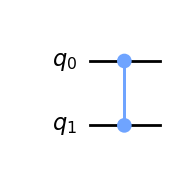

In [2]:
oracleCircuit=QuantumCircuit(2,name="oracleCircuit")
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

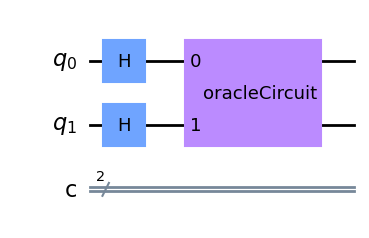

In [4]:
mainCircuit=QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

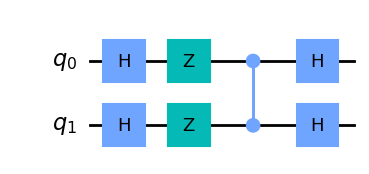

In [5]:
reflectionCircuit=QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

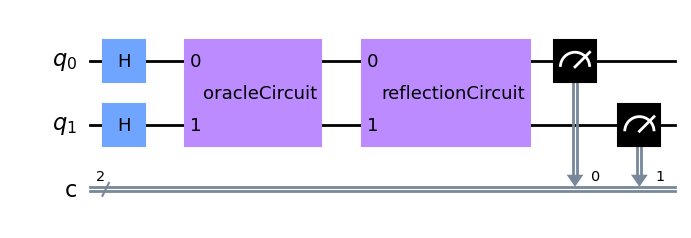

In [6]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

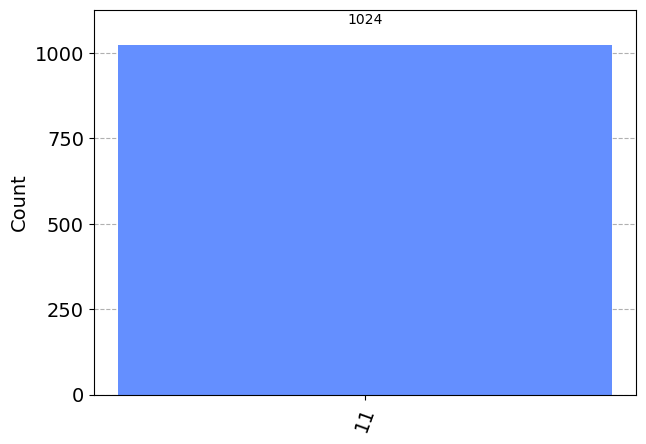

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(mainCircuit,backend=simulator,shots=1024).result()
counts=result.get_counts(mainCircuit)
plot_histogram([counts])